## AKONA CIKO _Unsupervised Learning Project

### Table of content

1. Project Overview
3. Dataset details
4. Packages & Libraries
5. Data collection & loading
6. Data Pre-processsing & Processing
7. Model training
8. Model deployment
9. Monitor model
10. Project Manager / Contributor

#### 1. Project Overview:

Key objectives_

1. Build a recommendation system using Collaborative Filtering (CF) and Content-Based Filtering (CBF).
3. Accurately predict ratings for unseen anime titles.
4. Develop a model that can be deployed in a production environment.
5. Implement data pre-processing to clean and prepare the data for training.
6. Develop a model that can be deployed in a production environment.
7. Monitor the system's performance after deployment and make updates as necessary.

Performing an initial review of my collected data for completeness and relevance involves systematically examining the dataset to ensure it is suitable for my Project & ensure it is the correct dataset.

This project focuses on building a collaborative and content-based recommender system for anime titles. The goal is to predict how a user will rate an anime they haven’t yet seen, based on both their historical preferences and the content (such as genre, description, etc.) of the anime itself.

#### 2. Dataset details:

For this project, the dataset is titled "Anime-dataset-2023". The data consists of user ratings and metadata about anime titles. Here's a breakdown of the data fields:

User Ratings:
User ID: A unique identifier for each user.
Anime ID: A unique identifier for each anime.
Rating: The score a user has given to an anime (1-10 scale, or possibly a 0-5 scale).
Timestamp: The time at which the rating was given.
Anime Metadata:
Anime ID: Unique identifier for each anime.
Title: Name of the anime.
Genres: List of genres the anime falls under (e.g., action, comedy, drama).
Description: A short summary of the anime's plot.
Year: The year the anime was released.
Type: Type of anime (e.g., TV series, movie, OVA).
Episodes: Number of episodes in the series.

#### 3. Packages & Libraries:

Packges & Libraries to Use_

I will need a set of libraries for this project, including those for data processing, machine learning, and model evaluation.

Required Packages:

1. pandas: For data manipulation and analysis.
2. numpy: For numerical operations.
3. scikit-learn: For machine learning algorithms and metrics.
4. surprise: A Python library for building recommender systems.
5. ensorflow or pytorch: For deep learning models, if needed.
6. matplotlib and seaborn: For data visualization.
7. flask or fastAPI: For model deployment.

#### 4. Data collection & loading: 

Data Sources:

Collect data from available anime rating datasets, such as MyAnimeList or Kaggle Anime Datasets.
For anime metadata, scrape websites like AniList, Kitsu, or use official APIs from anime databases.
Data Loading:

Will pandas to load the dataset from CSV, JSON, or directly from databases.

In [4]:
import pandas as pd
anime_metadata = pd.read_csv(r'C:\Users\F8871503\OneDrive - FRG\Documents\Explore_AI Data_Science\Unsupervised Learning.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\F8871503\\OneDrive - FRG\\Documents\\Explore_AI Data_Science\\Unsupervised Learning.csv'

In [6]:
import os
print(os.getcwd())

C:\Users\F8871503\Unsupervised Learning


In [ ]:
from tkinter import filedialog
from tkinter import Tk

# Hide the root window
root = Tk()
root.withdraw()

# Open file dialog and get the file path
file_path = filedialog.askopenfilename(title="anime-dataset-2023")
anime_metadata = pd.read_csv(file_path)

#### 5. Data Pre-processsing & Processing:

##### 1. Handling Missing Data:

For user ratings, I willfill missing ratings with mean or median values, or drop them if necessary.
For metadata, you may need to fill missing values (e.g., genres, descriptions) with placeholders or use other imputation methods.

In [ ]:
#Python_codes here !

##### 2. Data Transformation:

Text Processing: If using content-based filtering, process anime descriptions by converting them into a numerical format (using TF-IDF or Word2Vec).
Genre Encoding: Convert anime genres into a numerical representation using one-hot encoding or label encoding.

In [ ]:
#Python_codes here !

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# Example encoding for anime genres
encoder = OneHotEncoder(sparse=False)
genre_encoded = encoder.fit_transform(anime_metadata[['genres']])

##### 3. Feature Engineering:


Will Create features such as average rating, number of ratings, and anime release yearm? ///////???///

In [ ]:
#Python_codes here !

#### 6. Model training:

Matrix Factorization: Use methods like SVD (Singular Value Decomposition) or ALS (Alternating Least Squares) to factorize the user-item rating matrix.
Example using Surprise Library for SVD:

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 10))  # Assuming ratings are on a scale of 1-10
data = Dataset.load_from_df(user_ratings[['user_id', 'anime_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD()
model.fit(trainset)
predictions = model.test(testset)

Content-Based Filtering (CBF): TF-IDF: Convert the anime descriptions to a term frequency-inverse document frequency (TF-IDF) matrix and use cosine similarity to compute recommendations.
Example using TF-IDF for content-based filtering:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(anime_metadata['description'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Hybrid Model:

Combine both CF and CBF for a hybrid recommendation system. Use CF for collaborative recommendations and CBF for content-based suggestions. Blend them based on user preference.

In [ ]:
?????? COMBINE CODE

#### 7. Model deployment:

After training and tuning the model, deploy it to a production environment:

1. Model Serialization:

In [ ]:
Use pickle or joblib to save the trained model for later use.
                                              
import joblib
joblib.dump(model, 'svd_model.pkl')

2. API Development:

Use Flask or FastAPI to create a REST API that serves recommendations.
Example (Flask):

@app.route('/predict', methods=['GET'])
def predict():    anime_id = request.args.get('anime_id')    user_id = request.args.get('user_id')    # Make prediction based on the model    prediction = model.predict(user_id, anime_id)    return jsonify({'prediction': prediction.est})if __name__ == '__main__':    app.run(debug=True)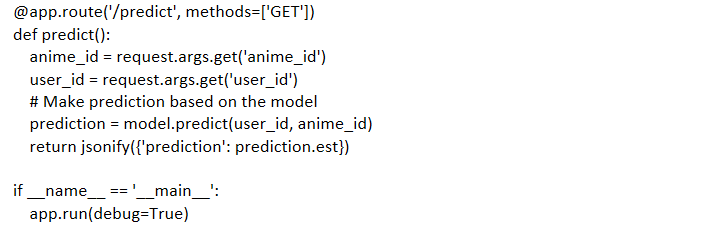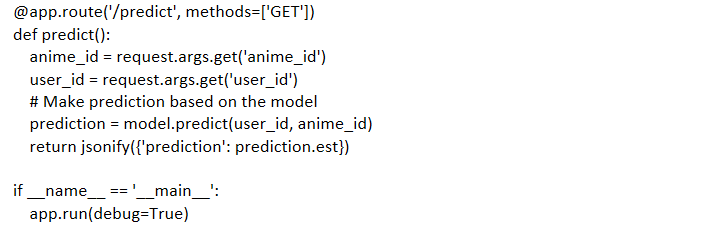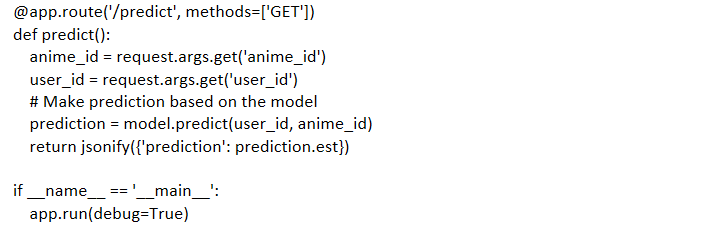

3. Containerization:

Containerize the API using Docker for easy deployment.

1. Model Serialization: Use pickle or joblib to save the trained model for later use.

#### 8. Monitor model:

1. Performance Monitoring: Track metrics such as MAE (Mean Absolute Error), RMSE (Root Mean Square Error), and precision to evaluate the recommender's effectiveness.
   
2. User Feedback: Collect feedback from users on the quality of recommendations and adjust the model accordingly.
   
3. Periodic Retraining:
Retrain the model periodically with new data to keep it up-to-date and maintain recommendation quality.

#### Project Manager / Contributor: Akona Ciko | Akonaciko1@gmail.com | Gibit1 (GitHub username)

#### Save:

In [ ]:
anime_metadata.to_csv("Processed_dataset_saved_1"), index=False

#### Note_Could not finish the Project because of FNB restricting access (Laptop) to important features, folders & other key things that I usually utilize.